<a href="https://colab.research.google.com/github/Alakhras/Abalone-Age/blob/main/Abalone_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification using Tensorflow and Keras
Aladdin Alakhras, University of Missouri-St. Louis

### **Problem:**
* Abalones are endangered marine snails found in cold coastal waters worldwide,  Their price is positively correlated with age.
  However, determining abalone age is complex.
A machine learning model to classify abalone age would significantly accelerate this manual process, benefiting abalone researchers and adding value to the field.

* Dataset: [`Abalone.csv`](https://github.com/Alakhras/Abalone-Age/blob/main/Abalone.csv)
  - This project classifies abalone snails as "young" or "old" based on their ring count, using input features such as gender, height, weight, etc.
* Original data at [UCI ML database](https://archive.ics.uci.edu/dataset/1/abalone)

#Phase 1: Exploratory Data Analysis & preparation of the Abalone Data Set


  We are going to use physical and biological attributes of abalone to predict whether an abalone is old or young. There are 4177 observations in this data set and 8 features. We have sex as a categorical feature indicating whether an abalone is male, female or infant. We have other 7 numeric features which describe the size and weight of abalones.
The missing values have been removed in the original research so we do not have missing values here.


Step 1: Load the data and Preview dataset shape and the first 5 rows

In [62]:
import numpy as np
import pandas as pd
import random
import os
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [63]:
BASE_PATH = 'https://raw.githubusercontent.com/Alakhras/Abalone-Age/main/Abalone.csv'
dataset1 = pd.read_csv(BASE_PATH)
print(dataset1.shape)
dataset1.head()


(4177, 9)


Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [64]:
dataset1.describe()


Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

The minimum value in height is **zero**. There are some zero values in height feature so checking the 'height' feature.

In [65]:
dataset1[dataset1.Height == 0]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Rings  
1257          0.0860        0.1150      8  
3996          0.0285        0.3505      6

There are only two rows with **zero** values. We can remove these two rows from our dataset and consider the rest of the data for the model.


In [67]:
dataset2 = dataset1[dataset1.Height != 0]
print(dataset2.shape)
dataset2.describe()
dataset2['Height'].describe()

(4175, 9)


count    4175.000000
mean        0.139583
std         0.041725
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

<Axes: >

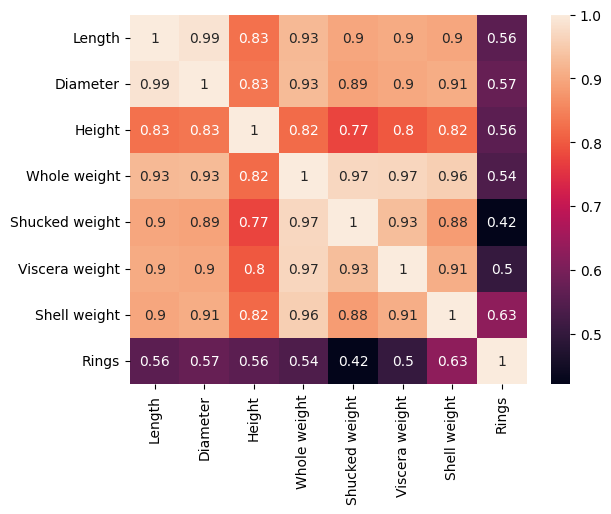

In [68]:
# Calculate the correlation matrix only for numeric columns.
dataset2.corr(numeric_only=True)

# Plotting the correlation
plt.figure(1)
sns.heatmap(dataset1.corr(numeric_only=True), annot=True)

*  Step 2: Prepare the output
*  Step 3: Shuffle the rows
*  Step 4: Split into Training/Validation Set
*   Step 5: Normalize (if needed)
*   Step 6: Review the dimensions of training & validation set


We prepare the output by classifing abalones with rings greater than 11 as old and less than 12 as young. This threshold is arbitrary.We can observe an unbalanced distribution of target variable.

In [69]:
dataset2["Is old"] = np.where(dataset2["Rings"] > 11, "Old", "Young")
dataset2.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings Is old  
0         0.150     15    Old  
1         0.070      7  Young  
2         0.210      9  Young  
3         0.155     10  Young  
4         0.055      7  Young

Then check if the data is imbalanced by calculating what percentage of the output labels are 0 and what percentage are 1 which is:

| Target  | Old | Young |
| --- | --- | --- |
| __Observations__ | 960 | 3217 |.
| __Observations__ | 23% | 77% |.

The dataset balanced and we can use it.



###Exploratory data analysis on training & validation sets

#### 3.1 Target variable distribution
Exploratory data analysis gives us a basic understanding of our train and validation data, and we may also find the some useful features to make young-old prediction for abalones. First, we plot the distribution of our target variable. The young-old class is derived from rings, so we also include the distribution of rings into our plot. From the figure we can observe a slightly right skewed distribution of `rings`. Since we set the threshold for old abalone as `rings > 11` , we get an unbalanced distribution of old and young abalone.

In [70]:
# Distribution of our target: rings and is_old
alt.Chart(dataset2, title="Distribution of target variables").mark_bar().encode(
    alt.X(alt.repeat(), type="nominal"), alt.Y("count()")
).repeat(["Rings", "Is old"])

alt.RepeatChart(...)

#### 3.2 Distribution of categorical variable
Sex is the only categorical variable in this data set. It has three categories: male, female and infant, denoted as M, F, I respectively. The distribution of sex is balanced.

In [71]:
# Distribution of categorical variable: sex
alt.Chart(dataset2, title="Distribution of sex").mark_bar().encode(
    alt.Y("Sex"), alt.X("count()")
)

alt.Chart(...)

#### 3.3 Distribution of continuous variables
We first get a summary table from our data set. However, this table does not contain intuitive information to help us make prediction.

In [72]:
dataset2.describe()

Length    Diameter       Height  Whole weight  Shucked weight  \
count  4175.000000  4175.00000  4175.000000   4175.000000     4175.000000   
mean      0.524065     0.40794     0.139583      0.829005        0.359476   
std       0.120069     0.09922     0.041725      0.490349        0.221954   
min       0.075000     0.05500     0.010000      0.002000        0.001000   
25%       0.450000     0.35000     0.115000      0.442250        0.186250   
50%       0.545000     0.42500     0.140000      0.800000        0.336000   
75%       0.615000     0.48000     0.165000      1.153500        0.502000   
max       0.815000     0.65000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4175.000000   4175.000000  4175.000000  
mean         0.180653      0.238834     9.935090  
std          0.109605      0.139212     3.224227  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.328750    11.000000  
max          0.760000      1.005000    29.000000

Then we plot the distribution of all numeric features within two targeted classes.From the plot we can group the numeric variables into three groups: (length, diameter), (height), and (whole_weight, shucked_weight, viscera_weight, shell_weight).  
The first group is left skewed. The means of two classes are similar and the old abalones have less deviation from mean.The second group has some outliers and the third group is right skewed. In the third group, we can observe a difference in mean weights and the distribution of old abalones are more bell-shaped.

In [73]:
# Distribution of numeric variables: 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'
alt.Chart(dataset2, title="Distribution of numeric variables").mark_bar(
    opacity=0.5
).encode(
    alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=50)),
    alt.Y("count()", stack=None),
    color="Is old",
).repeat(
    [
        "Length",
        "Diameter",
        "Height",
        "Whole weight",
        "Shucked weight",
        "Viscera weight",
        "Shell weight",
    ],
    columns=2,
)

alt.RepeatChart(...)

####3.4 Correlation of target variables and one feature variable from each group
We are also interested in how these three groups correlate with target variable rings and whether there is a difference in young and old abalones. We select length, height and whole weight as representatives. We can observe a difference in the regression line in two target classes when the predicting variables are length and whole weight.

In [74]:
point_length = (
    alt.Chart(
        dataset2,
        title="A difference in correlation between length and rings from old and young abalones",
    )
    .mark_circle(opacity=0.3)
    .encode(x=alt.X("Length"), y=alt.Y("Rings"), color="Is old")
)
point_length + point_length.transform_regression(
    "Length", "Rings", groupby=["Is old"]
).mark_line(color="red")

alt.LayerChart(...)

In [75]:
point_height = (
    alt.Chart(
        dataset2,
        title="A difference in correlation between height and rings from old and young abalones",
    )
    .mark_circle(opacity=0.2)
    .encode(x=alt.X("Height"), y=alt.Y("Rings"), color="Is old")
)
point_height + point_height.transform_regression(
    "Height", "Rings", groupby=["Is old"]
).mark_line(color="red")

alt.LayerChart(...)

In [76]:
point_weight = (
    alt.Chart(
        dataset2,
        title="A difference in correlation between weight and rings from old and young abalones",
    )
    .mark_circle(opacity=0.3)
    .encode(x=alt.X("Whole weight"), y=alt.Y("Rings"), color="Is old")
)
point_weight + point_weight.transform_regression(
    "Whole weight", "Rings", groupby=["Is old"]
).mark_line(color="red")

alt.LayerChart(...)

#### 3.5 Scatter plots showing the relationship between continuous features
We can expect colinearity in our numeric features. The size features (length, diameter and height) are correlated and size is correlated with weight. We may want to be extra careful when we want to implement models which are sensitive to highly correlated features. From the first group of scatter plots, we can tell that length, diameter and height are linearly correlated. The correlation between size and weight is more non-linear. From the second group of scatter plots, we find that feature of weight are correlated, but the correlations are not as strong as correlation in size features. The relationship between weight and age is hard to tell. Roughly, it is a positive relation.

In [77]:
features = ["Length", "Diameter", "Height", "Whole weight"]

alt.Chart(dataset2, title="Distribution of numeric variables").mark_point(
    size=5, opacity=0.1
).encode(
    alt.X(alt.repeat("row"), type="quantitative"),
    alt.Y(alt.repeat("column"), type="quantitative"),
).properties(
    height=200, width=200
).repeat(
    column=features, row=features, columns=2
)

alt.RepeatChart(...)

In [78]:
features = ["Shucked weight", "Viscera weight", "Shell weight", "Rings"]
alt.Chart(dataset2, title="Distribution of numeric variables").mark_point(
    size=5, opacity=0.1
).encode(
    alt.X(alt.repeat("row"), type="quantitative"),
    alt.Y(alt.repeat("column"), type="quantitative"),
).properties(
    height=200, width=200
).repeat(
    column=features, row=features, columns=2
)

alt.RepeatChart(...)

#### 3.6 Correlation heat map
A correlation heat map provides us with more visually intuitive relationship between all variables. From the heat map we can tell that feature variables are highly correlated.

In [79]:
# check colinearity in features
corr_df = (
    dataset2.drop(["Sex", "Is old"], axis=1)
    .corr("spearman")
    .abs()
    .stack()
    .reset_index(name="corr")
)
alt.Chart(corr_df).mark_rect().encode(
    x="level_0", y="level_1", size="corr", color="corr"
)

alt.Chart(...)

#Convert 'Sex' and 'Is old' columns to numeric representation

In [80]:
# Convert 'Sex' column to numeric representation
# Assuming 'Sex' column contains 'M' , 'F' and 'I'
dataset2['Sex'] = dataset2['Sex'].map({'M': 1, 'F': 0, 'I': 2}).astype(float)  # Apply astype(float) to the Series after mapping

In [81]:
#Convert 'Is old' column to numeric representation
dataset2['Is old'] = dataset2['Is old'].map({'Old': 1, 'Young': 0}).astype(float)  # Apply astype(float) to the Series after mapping

In [82]:
dataset = dataset2.to_numpy()

In [83]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(dataset[0:5, :])

[[1.00 0.46 0.36 0.10 0.51 0.22 0.10 0.15 15.00 1.00]
 [1.00 0.35 0.27 0.09 0.23 0.10 0.05 0.07 7.00 0.00]
 [0.00 0.53 0.42 0.14 0.68 0.26 0.14 0.21 9.00 0.00]
 [1.00 0.44 0.36 0.12 0.52 0.22 0.11 0.15 10.00 0.00]
 [2.00 0.33 0.26 0.08 0.20 0.09 0.04 0.06 7.00 0.00]]


##Shuffling the dataset for reliability

In [84]:
# Shuffle the dataset
np.random.shuffle(dataset)


In [85]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(dataset[0:5, :])

[[1.00 0.56 0.43 0.18 1.03 0.35 0.20 0.31 20.00 1.00]
 [0.00 0.58 0.45 0.12 0.87 0.35 0.21 0.23 6.00 0.00]
 [1.00 0.63 0.47 0.15 1.14 0.54 0.23 0.31 12.00 1.00]
 [2.00 0.44 0.33 0.14 0.41 0.16 0.10 0.12 6.00 0.00]
 [1.00 0.34 0.23 0.09 0.15 0.07 0.03 0.04 6.00 0.00]]


##Split into Training/Validation Set

In [86]:
index_20percent = int(0.2 * len(dataset[:, 0]))
print(index_20percent)

835


In [87]:
XVALIDATION = dataset[:index_20percent, :-1]
YVALIDATION = dataset[:index_20percent, -1]

XTRAIN = dataset[index_20percent:, 0:-1]
YTRAIN = dataset[index_20percent:, -1]

##Normalize the dataset

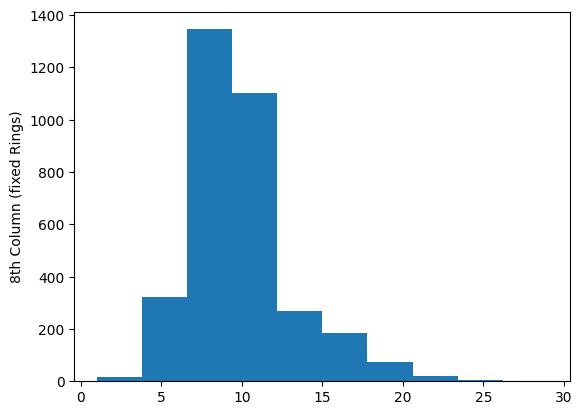

In [88]:
plt.hist(XTRAIN[:, 8])
plt.ylabel('8th Column (fixed Rings)')
plt.show()

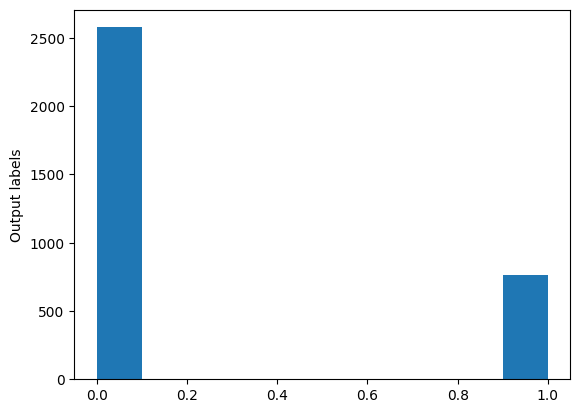

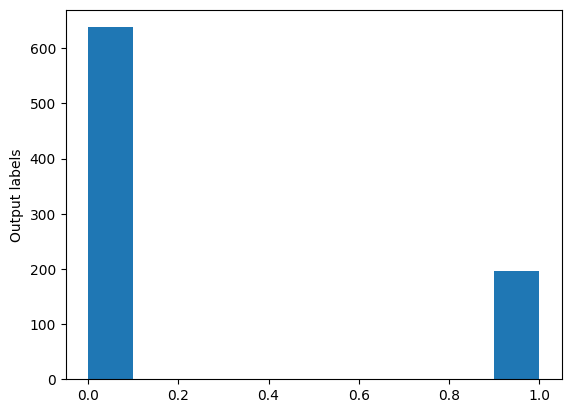

In [89]:
plt.hist(YTRAIN)
plt.ylabel('Output labels')
plt.show()

plt.hist(YVALIDATION)
plt.ylabel('Output labels')
plt.show()

In [90]:
# Normalize features only for the training set
X_min = np.min(XTRAIN, axis=0)
X_max = np.max(XTRAIN, axis=0)
X_TRAIN_normalized = (XTRAIN - X_min) / (X_max - X_min)

X_VALIDATION_normalized = (XVALIDATION - X_min) / (X_max - X_min)  # Use the same min and max to scale test data
print(X_TRAIN_normalized.shape)
print(X_VALIDATION_normalized.shape)

(3340, 9)
(835, 9)


In [91]:
print(XTRAIN.shape)
print(YTRAIN.shape)
print(X_VALIDATION_normalized.shape)
print(X_TRAIN_normalized.shape)
print(YVALIDATION.shape)
print(XTRAIN[0:3,])
print(YTRAIN[0:3])
print(X_VALIDATION_normalized[0:3,])
print(X_TRAIN_normalized[0:3,])
print(XVALIDATION[0:3,])
print(YVALIDATION[0:3])

(3340, 9)
(3340,)
(835, 9)
(3340, 9)
(835,)
[[2.00 0.31 0.23 0.07 0.11 0.43 0.01 0.04 5.00]
 [2.00 0.47 0.36 0.10 0.13 0.20 0.09 0.12 7.00]
 [2.00 0.60 0.49 0.14 1.05 0.37 0.23 0.36 12.00]]
[0.00 0.00 1.00]
[[0.50 0.66 0.64 0.16 0.36 0.24 0.27 0.34 0.68]
 [0.00 0.69 0.66 0.10 0.31 0.24 0.27 0.25 0.18]
 [0.50 0.75 0.70 0.12 0.40 0.36 0.31 0.35 0.39]]
[[1.00 0.32 0.29 0.05 0.04 0.29 0.02 0.04 0.14]
 [1.00 0.54 0.52 0.08 0.05 0.14 0.11 0.14 0.21]
 [1.00 0.72 0.74 0.12 0.37 0.25 0.30 0.40 0.39]]
[[1.00 0.56 0.43 0.18 1.03 0.35 0.20 0.31 20.00]
 [0.00 0.58 0.45 0.12 0.87 0.35 0.21 0.23 6.00]
 [1.00 0.63 0.47 0.15 1.14 0.54 0.23 0.31 12.00]]
[1.00 0.00 1.00]


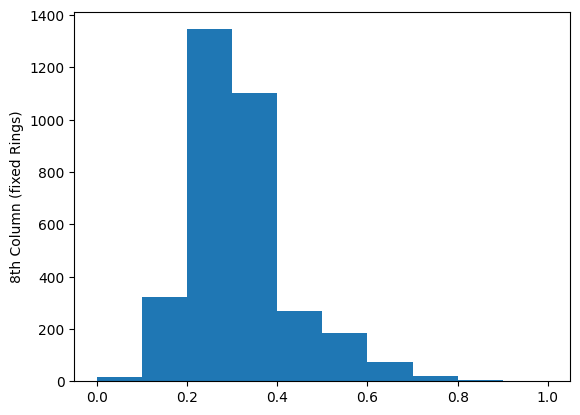

In [92]:
plt.hist(X_TRAIN_normalized[:, 8])
plt.ylabel('8th Column (fixed Rings)')
plt.show()

###Phase 2: Build a model to overfit the entire dataset


*   Step 7: Create a neural network model
*   Step 8: Compile the model
*   Step 9: Train the model
*   Step 10: Check the learning curves
*   Step 11: Evaluate the model on the dataset
*   Step 13: Check what what the model actually predicts
*   Step 14: Is 'accuracy' sufficient to evaluate our model?


we want to determine how big architecture we need to overfit the data. The place to start is to use ‘logistic regression’ model and train for as many epochs as needed to obtain as high accuracy as possible so we will use the dataset without splitting then normalize it.

In [93]:
# Separate features and target
X = dataset[:, :-1]
y = dataset[:, -1]

# Normalize features
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_normalized = (X - X_min) / (X_max - X_min)

1.   Model Creation and Training: A function to create and compile a neural network model is defined, allowing for flexibility in architecture.
The initial model starts as a logistic regression model (1 neuron).
After training, the learning curves for both loss and accuracy are plotted to visualize the model's performance.
2.   Evaluation: The model is evaluated on the entire dataset, and predictions are made, followed by calculating additional metrics (precision, recall, and F1 score).
The prediction results for the first ten samples are displayed.
3.   Iterative Model Growth: A separate function is implemented to test various neuron configurations (2, 4, 8, 16, 32 neurons).
The function evaluates each architecture, tracks the best performing one, and ceases the search when an architecture achieves at least 99.5% accuracy.

This phase aims to discover the minimal architecture needed to overfit the dataset. The insights gained here will guide model simplification for generalization in subsequent phases, such as Phase 3. Evaluating the model using metrics besides accuracy, like precision, recall, and F1 score, provides essential insights, as focusing solely on accuracy may miss potential pitfalls with imbalanced datasets or misclassified predictions.

Ensure thorough documentation of all findings, architectures tested, and iterations made during this phase, which will be important for your final report and recommendations. Let me know if you need assistance with any particular component or guidance on metric analysis!








Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6604 - loss: 0.6931
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7706 - loss: 0.6561
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 0.6345
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7611 - loss: 0.6138
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7634 - loss: 0.5973
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7743 - loss: 0.5789
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7772 - loss: 0.5664
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7632 - loss: 0.5678
Epoch 9/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7720 - loss: 0.5552
Epoch 10/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7730 - loss: 0.5495
Epoch 11/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7620 - loss: 0.5556
Epoch 12/100
131/131 ━━━━━━━━━━━━━━━━━━━━

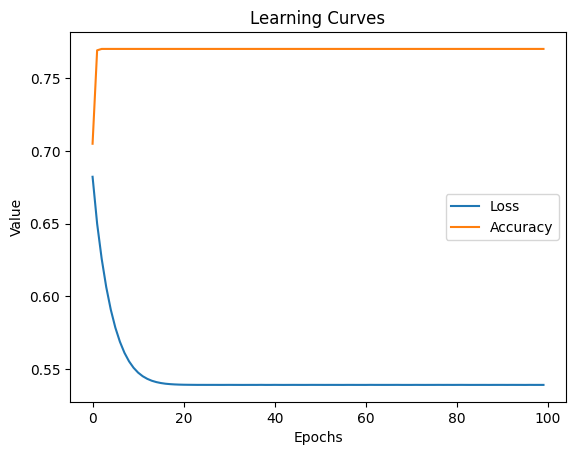

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7674 - loss: 0.5424
Final accuracy on entire dataset: 77.01%
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predictions: [0.23 0.23 0.23 0.23 0.23 0.23 0.23 0.23 0.23 0.23]
Binary Predictions: [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
True Values: [1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
Precision: 0.00, Recall: 0.00, F1 Score: 0.00

Testing architecture with 2 neurons
Architecture with [2] neurons achieved accuracy: 100.00%
Overfit achieved with architecture [2].


Summary of model architectures tested:
Neurons: 2, Accuracy: 100.00%

Best Architecture: [2] neurons with accuracy 100.00%


In [94]:


# Define a function to create and compile the model
def create_compile_model(input_shape, layers):
    model = Sequential()
    for i, neurons in enumerate(layers):
        if i == 0:
            model.add(Dense(neurons, input_shape=input_shape, activation='relu'))
        else:
            model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initial model: Logistic Regression (1 neuron)
model = create_compile_model((X_normalized.shape[1],), [1])

# Train the model
history = model.fit(X_normalized, y, epochs=100, verbose=1)

# Plot learning curves
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# Evaluate the model
accuracy = model.evaluate(X_normalized, y, verbose=1)[1]
print(f'Final accuracy on entire dataset: {accuracy * 100:.2f}%')

# Check model predictions
predictions = model.predict(X_normalized).flatten()
predictions_binary = np.round(predictions)

# Analyze predictions
print(f'Predictions: {predictions[:10]}')
print(f'Binary Predictions: {predictions_binary[:10]}')
print(f'True Values: {y[:10]}')

# Additional Metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, predictions_binary)
recall = recall_score(y, predictions_binary)
f1 = f1_score(y, predictions_binary)

print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

# Model growth
# Check and iteratively increase the complexity if needed
def iteratively_increase_model():
    for neurons in [2, 4, 8, 16]:
        model = create_compile_model((X_normalized.shape[1],), [neurons])
        model.fit(X_normalized, y, epochs=100, verbose=1)
        accuracy = model.evaluate(X_normalized, y, verbose=0)[1]
        if accuracy >= 0.995:
            print(f'Overfit achieved with architecture [ {neurons} ]')
            break
        else:
            print(f'Architecture [ {neurons} ] achieved accuracy: {accuracy * 100:.2f}%')

# iteratively_increase_model()
# Iterate over different architectures
def iteratively_increase_model(X, y):
    architectures_tested = []
    best_accuracy = 0
    best_architecture = None

    # Vary the number of neurons in simple iterative architectures
    for neurons in [2, 4, 8, 16, 32]:
        print(f"\nTesting architecture with {neurons} neurons")
        model = create_compile_model((X_normalized.shape[1],), [neurons])
        history = model.fit(X, y, epochs=500, verbose=0)  # Increase epochs for deeper training

        # Evaluate the model on the entire dataset
        accuracy = model.evaluate(X, y, verbose=0)[1]
        architectures_tested.append((neurons, accuracy * 100))

        print(f'Architecture with [{neurons}] neurons achieved accuracy: {accuracy * 100:.2f}%')

        # Check if this architecture overfits well
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_architecture = neurons

        # Break if exceeding 99% accuracy signifies overfitting
        if accuracy >= 0.995:
            print(f'Overfit achieved with architecture [{neurons}].\n')
            break

    # Print summary of results
    print("\nSummary of model architectures tested:")
    for neurons, acc in architectures_tested:
        print(f'Neurons: {neurons}, Accuracy: {acc:.2f}%')

    print(f"\nBest Architecture: [{best_architecture}] neurons with accuracy {best_accuracy * 100:.2f}%")

# Run the architecture testing
iteratively_increase_model(X_normalized, y)

#Phase 3: Model selection & evaluation
*   Step 7: Create a neural network model
*   Step 8: Compile the model
*   Step 9: Train the model
*   Step 10: Check the learning curves
*   Step 11: Evaluate the model on the training data
*   Step 12: Evaluate on validation set
*   Step 13: Check what what the model actually predicts
*   Step 14: Is 'accuracy' sufficient to evaluate our model?


Logistic Regression - Training Accuracy: 0.8416167664670658
Logistic Regression - Validation Accuracy: 0.8502994011976048

Epoch 1: val_loss improved from inf to 0.51533, saving model to best_model.keras

Epoch 2: val_loss improved from 0.51533 to 0.40291, saving model to best_model.keras

Epoch 3: val_loss improved from 0.40291 to 0.35180, saving model to best_model.keras

Epoch 4: val_loss improved from 0.35180 to 0.31878, saving model to best_model.keras

Epoch 5: val_loss improved from 0.31878 to 0.28869, saving model to best_model.keras

Epoch 6: val_loss improved from 0.28869 to 0.26184, saving model to best_model.keras

Epoch 7: val_loss improved from 0.26184 to 0.22547, saving model to best_model.keras

Epoch 8: val_loss improved from 0.22547 to 0.19897, saving model to best_model.keras

Epoch 9: val_loss improved from 0.19897 to 0.18149, saving model to best_model.keras

Epoch 10: val_loss improved from 0.18149 to 0.15693, saving model to best_model.keras

Epoch 11: val_loss i

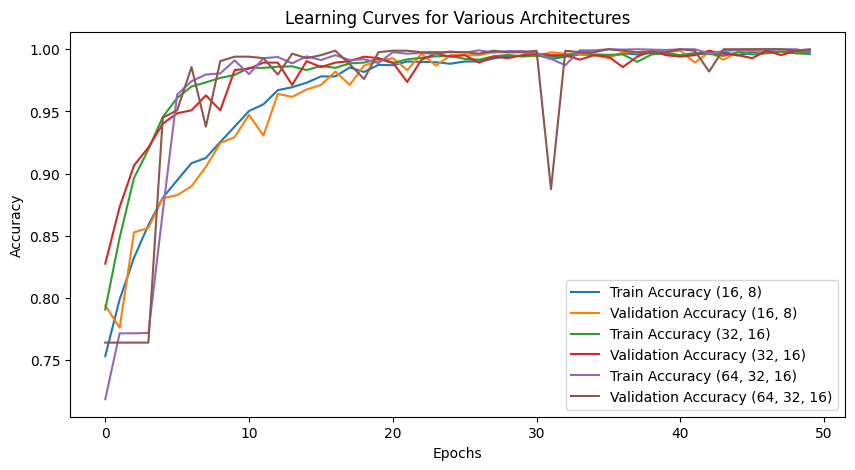

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
Accuracy: 533.9557
Precision: 0.2359
Recall: 0.2359
F1 Score: 0.2359
The best performing model architecture is: (64, 32, 16) with validation accuracy: 1.0000


In [95]:
# Helper function to create neural network models
def create_model(layer_sizes):
    model = keras.Sequential()
    for size in layer_sizes:
        model.add(layers.Dense(size, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Baseline Logistic Regression Implementation
class LogisticRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, epochs=1000, learning_rate=0.01):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        m = len(y)

        for _ in range(epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            dw = (1 / m) * np.dot(X.T, (y_predicted - y))
            db = (1 / m) * np.sum(y_predicted - y)
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return (y_predicted > 0.5).astype(int)

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(XTRAIN, YTRAIN)
logistic_acc_train = np.mean(logistic_model.predict(XTRAIN) == YTRAIN)
logistic_acc_val = np.mean(logistic_model.predict(XVALIDATION) == YVALIDATION)

# Print logistic regression results
print("Logistic Regression - Training Accuracy:", logistic_acc_train)
print("Logistic Regression - Validation Accuracy:", logistic_acc_val)

# Define neural network architectures to evaluate
model_architectures = [
    (16, 8),         # Model 1
    (32, 16),       # Model 2
    (64, 32, 16),   # Model 3
]

# Store results in a list
results = []

# Model Checkpointing
checkpoint_path = 'best_model.keras'  # Change file extension to .keras
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Training and evaluating neural network models
for arch in model_architectures:
    model = create_model(arch)
    history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=50, batch_size=32, verbose=0, callbacks=[checkpoint])

    train_loss, train_acc = model.evaluate(XTRAIN, YTRAIN, verbose=0)
    val_loss, val_acc = model.evaluate(XVALIDATION, YVALIDATION, verbose=0)
    total_params = model.count_params()

    results.append((str(arch), train_acc, val_acc, train_loss, val_loss, total_params))

# Output results table
results_df = pd.DataFrame(results, columns=['Model Architecture', 'Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss', 'Total Parameters'])
print(results_df)

# Plot Learning Curves
plt.figure(figsize=(10, 5))
for arch in model_architectures:
    model = create_model(arch) # The indentation of this line and the following line was incorrect. I have corrected it to align with the for loop
    history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=50, batch_size=32, verbose=0)

    # Plot learning curves
    plt.plot(history.history['accuracy'], label='Train Accuracy ' + str(arch))
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy ' + str(arch))

# Customize the plot
plt.title('Learning Curves for Various Architectures')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Load the best model
best_model = keras.models.load_model(checkpoint_path)

# Make predictions and evaluate the best model on validation set
y_pred = (best_model.predict(XVALIDATION) > 0.5).astype(int)

# Custom classification report function
def classification_report(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) else 0.0
    recall = tp / (tp + fn) if (tp + fn) else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0.0

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }

# Evaluate the model using additional metrics
report = classification_report(YVALIDATION, y_pred)

# Print classification report
print("Classification Report:")
for key, value in report.items():
    print(f"{key}: {value:.4f}")

# Conclusion about model performance
best_architecture = model_architectures[np.argmax([result[2] for result in results])]
print(f"The best performing model architecture is: {best_architecture} with validation accuracy: {max([result[2] for result in results]):.4f}")

![](https://github.com/badriadhikari/DL-2020spring/blob/master/notebooks/neural-network.png?raw=true)

## Step 15: How can the performance be improved?  
* Increase the number of epochs to 100 or 150
* Add more layers into the neural networks
* How to balance the data?
* Increase/Decrease the number of rows in the training/validation set